In [1]:
import numpy as np
import symengine as spe
import matplotlib.pyplot as plt
import csv
import sympy
import copy
import torch
from utils import *
import matplotlib as mpl
import pandas as pd

In [2]:
t = spe.symbols('t')
exec(open("../GODE/scipy_solver.py").read())
def round_expr(expr, num_digits):
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(sympy.Number)})

# ODEBench

In [3]:
# Load the data
DATA_TYPE = 'data_noisy'
noise_sigma = 0.05
all_true_data = []
all_gvae_data = []
all_odeformer128_data = []
all_odeformer64_data = []
all_odeformerORG_data = []
all_pysr_data = []
all_proged_data = []
for i in range(1,24):
    case = str(i)
    print('Case ', i)
    exec(open("../GODE/examples/odeformer"+case+".py").read())
    exec(open("../GODE/examples/odeformer_basic.py").read())
    true_sol = solve_ode(true_eq, t_low, t_high, fs = fs, y0=y0, order = ORDER, CHECK_SUCCESS = False)
    all_true_data.append([true_eq, u_val, true_sol])
    # open GVAE predictions
    curr_loss = 1e6
    with open('GODE_results/Output_explicit_ID'+case+'.csv', mode = 'r') as csvfile:
        csv_read = csv.reader(csvfile)
        k = 0
        for row in csv_read:
            if k == 0:
                k += 1
                continue
            _, eq, loss = row
            if float(loss) < curr_loss:
                curr_loss = float(loss)
                curr_eq = eq
            k += 1
    gvae_sol = solve_ode(curr_eq, t_low, t_high, fs = fs, y0=y0, order = ORDER, CHECK_SUCCESS = False)
    all_gvae_data.append([curr_eq, gvae_sol])
    # open ODEFormer predictions 64x128x128
    best_r2 = float('-inf')
    with open('Others_results/ODEFormer/250403_64_128_128_RS/Output_explicit_odeformer128_RS_ID'+case+'.csv', mode = 'r') as csvfile:
        csv_read = csv.reader(csvfile)
        k = 0
        for row in csv_read:
            if k == 0:
                k += 1
                continue
            eq, r2 = row
            if float(r2) > best_r2:
                best_r2 = float(r2)
                curr_eq = eq
            k += 1
    curr_eq = curr_eq.replace('x_0', 'u')
    odeformer_sol = solve_ode('-diff(u,t)+'+curr_eq, t_low, t_high, fs = fs, y0=y0, order = ORDER, CHECK_SUCCESS = False)
    all_odeformer128_data.append([curr_eq, odeformer_sol])
    # open ODEFormer predictions 64x64x64
    best_r2 = float('-inf')
    with open('Others_results/ODEFormer/250403_64_64_64_RS/Output_explicit_odeformer64_RS_ID'+case+'.csv', mode = 'r') as csvfile:
        csv_read = csv.reader(csvfile)
        k = 0
        for row in csv_read:
            if k == 0:
                k += 1
                continue
            eq, r2 = row
            if float(r2) > best_r2:
                best_r2 = float(r2)
                curr_eq = eq
            k += 1
    curr_eq = curr_eq.replace('x_0', 'u')
    odeformer_sol = solve_ode('-diff(u,t)+'+curr_eq, t_low, t_high, fs = fs, y0=y0, order = ORDER, CHECK_SUCCESS = False)
    all_odeformer64_data.append([curr_eq, odeformer_sol])
    # open ODEFormer predictions ORIGINAL
    best_r2 = float('-inf')
    with open('Others_results/ODEFormer/250403_ORG/Output_explicit_odeformerORG_RS_ID'+case+'.csv', mode = 'r') as csvfile:
        csv_read = csv.reader(csvfile) 
        k = 0
        for row in csv_read:
            if k == 0:
                k += 1
                continue
            eq, r2 = row
            if float(r2) > best_r2:
                best_r2 = float(r2)
                curr_eq = eq
            k += 1
    curr_eq = curr_eq.replace('x_0', 'u')
    odeformer_sol = solve_ode('-diff(u,t)+'+curr_eq, t_low, t_high, fs = fs, y0=y0, order = ORDER, CHECK_SUCCESS = False)
    all_odeformerORG_data.append([curr_eq, odeformer_sol])
    # PySR prediction
    best_loss = 1e6
    with open('Others_results/PySR/Output_explicit_pySR_ID'+case+'_best.csv', mode = 'r') as csvfile:
        csv_read = csv.reader(csvfile)
        k = 0
        for row in csv_read:
            if k == 0:
                k += 1
                continue
            eq, loss = row
            if float(loss) < curr_loss:
                curr_loss = float(loss)
                curr_eq = eq
            k += 1
    pysr_sol = solve_ode('-diff(u,t)+'+curr_eq, t_low, t_high, fs = fs, y0=y0, order = ORDER, CHECK_SUCCESS = False)
    all_pysr_data.append([curr_eq, pysr_sol])
    # open ProGED predictions
    curr_loss = float('inf')
    with open('Others_results/ProGED/Output_explicit_ProGED_ID'+case+'_best.csv', mode = 'r') as csvfile:
        csv_read = csv.reader(csvfile)
        k = 0
        for row in csv_read:
            if k == 0:
                k += 1
                continue
            eq, loss = row
            if float(loss) < curr_loss:
                curr_loss = float(loss)
                eqs = eq.split(',')
                curr_eq = eqs[1][:-1].replace('x0', 'u')
            k += 1
    proged_sol = solve_ode('-diff(u,t)+'+curr_eq, t_low, t_high, fs = fs, y0=y0, order = ORDER, CHECK_SUCCESS = False)
    all_proged_data.append([curr_eq, proged_sol])

Case  1
Successfully solved ODE! 0
Noise level: 0.05
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Case  2
Successfully solved ODE! 0
Noise level: 0.05
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Case  3
Successfully solved ODE! 0
Noise level: 0.05
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Case  4
Successfully solved ODE! 0
Noise level: 0.05
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Case  5
Successfully solved ODE!

<lambdifygenerated-73>:2: RuntimeWarning: invalid value encountered in power
  return [-0.8*u*(1 - u)**1.2 + 0.2*u**1.2 - 0.2*u**2.2]
<lambdifygenerated-74>:2: RuntimeWarning: invalid value encountered in power
  return [-0.8*u*(1 - u)**1.2 + 0.2*u**1.2 - 0.2*u**2.2]


Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Case  11
Successfully solved ODE! 0
Noise level: 0.05
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Case  12
Successfully solved ODE! 0
Noise level: 0.05
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Case  13
Successfully solved ODE! 0
Noise level: 0.05
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Case  14
Successfully solved ODE! 0
Noise level: 0.05
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
S

<lambdifygenerated-127>:2: RuntimeWarning: invalid value encountered in power
  return [(u - 0.456559097279808)*sin(sin(sin(sin(sin(sin(0.3621315*u)**u) - 0.07694173))))]


Successfully solved ODE! 0
Successfully solved ODE! 0
Case  17
Successfully solved ODE! 0
Noise level: 0.05
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Case  18
Successfully solved ODE! 0
Noise level: 0.05
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Case  19
Successfully solved ODE! 0
Noise level: 0.05
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Case  20
Successfully solved ODE! 0
Noise level: 0.05
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
S

# Additional samples
Change time_out of solve_ode to 5s!

In [4]:
# Load the data
DATA_TYPE = 'data_noisy'
noise_sigma = 0.05
for i in range(1, 8):
    case = str(i)
    print('Case ', i)
    exec(open("../GODE/examples/odeformer_add"+case+".py").read())
    exec(open("../GODE/examples/odeformer_basic.py").read())
    true_sol = solve_ode(true_eq, t_low, t_high, fs = fs, y0=y0, order = ORDER, CHECK_SUCCESS = False)
    all_true_data.append([true_eq, u_val, true_sol])
    # open GVAE predictions
    print('GVAE')
    curr_loss = 1e6
    curr_eq = ''
    with open('GODE_results/Output_explicit_addID'+case+'.csv', mode = 'r') as csvfile:
        csv_read = csv.reader(csvfile)
        k = 0
        for row in csv_read:
            if k == 0:
                k += 1
                continue
            _, eq, loss = row
            if float(loss) < curr_loss:
                curr_loss = float(loss)
                curr_eq = eq
            k += 1
    gvae_sol = solve_ode(curr_eq, t_low, t_high, fs = fs, y0=y0, order = ORDER, CHECK_SUCCESS = False)
    all_gvae_data.append([curr_eq, gvae_sol])
    # open ODEFormer predictions 64x128x128
    best_r2 = float('-inf')
    print('ODEformer')
    with open('Others_results/ODEFormer/250403_64_128_128_RS/Output_explicit_odeformer128_RS_addID'+case+'.csv', mode = 'r') as csvfile:
        csv_read = csv.reader(csvfile)
        k = 0
        for row in csv_read:
            if k == 0:
                k += 1
                continue
            eq, r2 = row
            if float(r2) > best_r2:
                best_r2 = float(r2)
                curr_eq = eq
            k += 1
    curr_eq = curr_eq.replace('x_0', 'u')
    odeformer_sol = solve_ode('-diff(u,t)+'+curr_eq, t_low, t_high, fs = fs, y0=y0, order = ORDER, CHECK_SUCCESS = False)
    all_odeformer128_data.append([curr_eq, odeformer_sol])
    # open ODEFormer predictions 64x64x64
    best_r2 = float('-inf')
    with open('Others_results/ODEFormer/250403_64_64_64_RS/Output_explicit_odeformer64_RS_addID'+case+'.csv', mode = 'r') as csvfile:
        csv_read = csv.reader(csvfile)
        k = 0
        for row in csv_read:
            if k == 0:
                k += 1
                continue
            eq, r2 = row
            if float(r2) > best_r2:
                best_r2 = float(r2)
                curr_eq = eq
            k += 1
    curr_eq = curr_eq.replace('x_0', 'u')
    odeformer_sol = solve_ode('-diff(u,t)+'+curr_eq, t_low, t_high, fs = fs, y0=y0, order = ORDER, CHECK_SUCCESS = False)
    all_odeformer64_data.append([curr_eq, odeformer_sol])
    # open ODEFormer predictions ORIGINAL
    best_r2 = float('-inf')
    with open('Others_results/ODEFormer/250403_ORG/Output_explicit_odeformerORG_RS_addID'+case+'.csv', mode = 'r') as csvfile:
        csv_read = csv.reader(csvfile)
        k = 0
        for row in csv_read:
            if k == 0:
                k += 1
                continue
            eq, r2 = row
            if float(r2) > best_r2:
                best_r2 = float(r2)
                curr_eq = eq
            k += 1
    curr_eq = curr_eq.replace('x_0', 'u')
    odeformer_sol = solve_ode('-diff(u,t)+'+curr_eq, t_low, t_high, fs = fs, y0=y0, order = ORDER, CHECK_SUCCESS = False)
    all_odeformerORG_data.append([curr_eq, odeformer_sol])
    curr_loss = float('inf')
    # open PySR predictions
    with open('Others_results/PySR/Output_explicit_pySR_add_ID'+case+'_best.csv', mode = 'r') as csvfile:
        csv_read = csv.reader(csvfile)
        k = 0
        for row in csv_read:
            if k == 0:
                k += 1
                continue
            eq, loss = row
            if float(loss) < curr_loss:
                curr_loss = float(loss)
                curr_eq = eq
            k += 1
    pysr_sol = solve_ode('-diff(u,t)+'+curr_eq, t_low, t_high, fs = fs, y0=y0, order = ORDER, CHECK_SUCCESS = False)
    all_pysr_data.append([curr_eq, pysr_sol])
    curr_loss = float('inf')
    with open('Others_results/ProGED/Output_explicit_ProGED_add_ID'+case+'_best.csv', mode = 'r') as csvfile:
        csv_read = csv.reader(csvfile)
        k = 0
        for row in csv_read:
            if k == 0:
                k += 1
                continue
            eq, loss = row
            eqs = eq.split(',')
            curr_equation = eqs[1][:-1].replace('x0', 'u')
            try: 
                solve_ode('-diff(u,t)+'+curr_equation, t_low, t_high, fs = fs, y0=y0, order = ORDER, CHECK_SUCCESS = False)
                if float(loss) < curr_loss:
                    curr_loss = float(loss)
                    curr_eq = curr_equation
            except:
                continue
            k += 1
    proged_sol = solve_ode('-diff(u,t)+'+curr_eq, t_low, t_high, fs = fs, y0=y0, order = ORDER, CHECK_SUCCESS = False)
    all_proged_data.append([curr_eq, proged_sol])

Case  1
This is an additional example outside of ODEBench
Successfully solved ODE! 0
Noise level: 0.05
Successfully solved ODE! 0
GVAE
Successfully solved ODE! 0
ODEformer
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0


<lambdifygenerated-191>:2: RuntimeWarning: overflow encountered in exp
  return [0.078962475 - sin(u - 0.30075228/(exp(-u + 0.18167241/u) + 2.48689488961076))]


Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Case  2
This is an additional example outside of ODEBench
Successfully solved ODE! 0
Noise level: 0.05
Successfully solved ODE! 0
GVAE
Successfully solved ODE! 0
ODEformer
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Case  3
This is an additional example outside of ODEBench
Successfully solved ODE! 0
Noise level: 0.05
Successfully solved ODE! 0
GVAE
Successfully solved ODE! 0
ODEformer
Successfully solved ODE! 0
Successfully solved ODE! 0


<lambdifygenerated-213>:2: RuntimeWarning: invalid value encountered in log
  return [0.0034579656578594704*t + 2.1034204935477185*(log(u) - 3.6909463496601094)*(log(u) + 0.056741483038834547) - 1.036267020328184]


Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Case  4
This is an additional example outside of ODEBench
Successfully solved ODE! 0
Noise level: 0.05
Successfully solved ODE! 0
GVAE
Successfully solved ODE! 0
ODEformer
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Case  5
This is an additional example outside of ODEBench
Successfully solved ODE! 0
Noise level: 0.05
Successfully solved ODE! 0
GVAE
Successfully solved ODE! 0
ODEformer
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successfully solved ODE! 0
Successf

# Results figure - paper

In [5]:
def getR2(true, pred):
    true = np.array(true)
    pred = np.array(pred)
    return 1 - np.sum((true - pred)**2)/np.sum((true - np.mean(true))**2)

def getrelL2Error(true, pred):
    true = np.array(true)
    pred = np.array(pred)
    return np.sqrt(np.sum((true - pred)**2))/np.sqrt(np.sum((true)**2))

In [6]:
# initialise lists
R2_dict = dict()
L2_dict = dict()
label = ['odeformerORG','odeformer128','odeformer64',  'pysr', 'proged','gvae']
for l in label:
    R2_dict[l] = []
    L2_dict[l] = []
# save 1st R2 for u(t), 2nd R2 for u'(t)

In [7]:
for i in range(0, 30):
    true_u = all_true_data[i][2][1].flatten()
    true_du = all_true_data[i][2][2].flatten()
    for l in label:
        pred_u = locals()[f"all_{l}_data"][i][1][1].flatten()
        pred_du = locals()[f"all_{l}_data"][i][1][2].flatten()
        R2_dict[l].append([getR2(true_u, pred_u), getR2(true_du, pred_du)])
        L2_dict[l].append([getrelL2Error(true_u, pred_u), getrelL2Error(true_du, pred_du)])

In [8]:
for l in label:
    L2_dict[l] = np.array(L2_dict[l])
    R2_dict[l] = np.array(R2_dict[l])

In [9]:
# symbols
symbol_dict = dict()
symbol_dict['odeformer64'] = '.'
symbol_dict['odeformer128'] = 'o'
symbol_dict['odeformerORG'] = 'o'
symbol_dict['pysr'] = '^'
symbol_dict['proged'] = 'v'
symbol_dict['gvae'] = '*'
color_dict = dict()
color_dict['odeformer64'] = '0.0'
color_dict['odeformer128'] = '0.3'
color_dict['odeformerORG'] = '0.6'
color_dict['pysr'] = 'tab:red'
color_dict['proged'] = 'tab:green'
color_dict['gvae'] = 'tab:orange'

Print_labels_dict = dict()
Print_labels_dict['odeformer64'] = 'ODEF. 64'
Print_labels_dict['odeformer128'] = 'ODEF. 128'
Print_labels_dict['odeformerORG'] = 'ODEF. ORG'
Print_labels_dict['pysr'] = 'PySR'
Print_labels_dict['proged'] = 'ProGED'
Print_labels_dict['gvae'] = 'GODE'

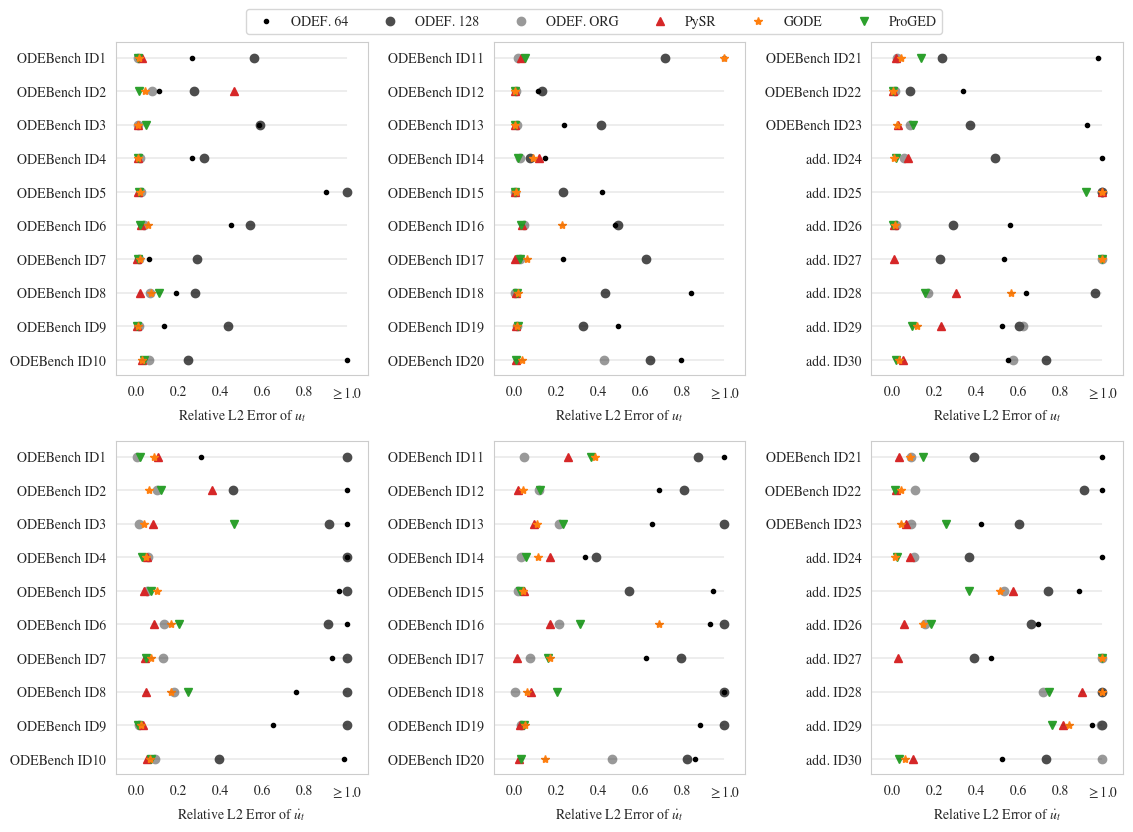

In [10]:
# results plot
mpl.rc('font', family = 'Times')
mpl.rcParams['mathtext.fontset'] = 'stix'
fig, axs = plt.subplots(2, 3, figsize=(13, 9.5))
# first row u(t)
# second row u'(t)
# plot ODE Bench results
ids = range(1,31)
for i in range(9, -1, -1):
    # thin black line
    axs[0,0].plot([-0.2, 1.], [i, i], color = 'black', linewidth = 0.1)
    for l in label:
        if i == 0:
            axs[0,0].plot(min(L2_dict[l][i][0],1),'ODEBench ID' + str(ids[i]), symbol_dict[l], label = Print_labels_dict[l], color = color_dict[l]) #
        else:
            axs[0,0].plot(min(L2_dict[l][i][0],1),'ODEBench ID' + str(ids[i]), symbol_dict[l], color = color_dict[l]) #label = l,
    # thin black line
    axs[1,0].plot([-0.2, 1.], [i, i], color = 'black', linewidth = 0.1)
    for l in label:
        axs[1,0].plot(min(L2_dict[l][i][1],1),'ODEBench ID' + str(ids[i]), symbol_dict[l], color = color_dict[l]) #label = l,
for i in range(29,22,-1):
    # thin black line
    axs[0,2].plot([-0.2, 1.], [i-23, i-23], color = 'black', linewidth = 0.1)
    for l in label:
        axs[0,2].plot(min(L2_dict[l][i][0],1),'add. ID' + str(ids[i]), symbol_dict[l], color = color_dict[l]) # label = l,
    # thin black line
    axs[1,2].plot([-0.2, 1.], [i-23, i-23], color = 'black', linewidth = 0.1)
    for l in label:
        axs[1,2].plot(min(L2_dict[l][i][1],1),'add. ID' + str(ids[i]), symbol_dict[l], color = color_dict[l]) # label = l,
for i in range(22, 19, -1):
    # thin black line
    axs[0,2].plot([-0.2, 1.], [i-13, i-13], color = 'black', linewidth = 0.1)
    for l in label:
        axs[0,2].plot(min(L2_dict[l][i][0],1),'ODEBench ID' + str(ids[i]), symbol_dict[l], color = color_dict[l]) # label = l,
    # thin black line
    axs[1,2].plot([-0.2, 1.], [i-13, i-13], color = 'black', linewidth = 0.1)
    for l in label:
        axs[1,2].plot(min(L2_dict[l][i][1],1),'ODEBench ID' + str(ids[i]), symbol_dict[l],  color = color_dict[l]) #label = l,
for i in range(19, 9, -1):
    # thin black line
    axs[0,1].plot([-0.2, 1.], [i-10, i-10], color = 'black', linewidth = 0.1)
    for l in label:
        axs[0,1].plot(min(L2_dict[l][i][0],1),'ODEBench ID' + str(ids[i]), symbol_dict[l], color = color_dict[l]) # label = l,
    # thin black line
    axs[1,1].plot([-0.2, 1.], [i-10, i-10], color = 'black', linewidth = 0.1)
    for l in label:
        axs[1,1].plot(min(L2_dict[l][i][1],1),'ODEBench ID' + str(ids[i]), symbol_dict[l],  color = color_dict[l]) #label = l,
handles, labels = axs[0,0].get_legend_handles_labels() 
order = [2,1,0,3,5,4]
axs[0,0].legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc='upper center', bbox_to_anchor=(1.9, 1.12), ncols = 6)
axs[0,0].set_xlim([-0.1,1.1])
axs[0,0].set_xticks(ticks = [0, 0.2, 0.4, 0.6, 0.8, 1], labels = ['0.0', '0.2', '0.4', '0.6', '0.8', r'$\geq$1.0'])  #r'$\leq0.0$'
axs[0,0].set_xlabel(r'Relative L2 Error of $u_t$')
axs[1,0].set_xlim([-0.1,1.1])
axs[1,0].set_xticks(ticks = [0, 0.2, 0.4, 0.6, 0.8, 1], labels = ['0.0', '0.2', '0.4', '0.6', '0.8', r'$\geq$1.0'])  #r'$\leq0.0$'
axs[1,0].set_xlabel(r'Relative L2 Error of $\dot{u}_t$')
axs[0,1].set_xlim([-0.1,1.1])
axs[0,1].set_xticks(ticks = [0, 0.2, 0.4, 0.6, 0.8, 1], labels = ['0.0', '0.2', '0.4', '0.6', '0.8', r'$\geq$1.0']) #r'$\leq0.0$'
axs[0,1].set_xlabel(r'Relative L2 Error of $u_t$')
axs[1,1].set_xlim([-0.1,1.1])
axs[1,1].set_xticks(ticks = [0, 0.2, 0.4, 0.6, 0.8, 1], labels = ['0.0', '0.2', '0.4', '0.6', '0.8', r'$\geq$1.0']) #r'$\leq0.0$'
axs[1,1].set_xlabel(r'Relative L2 Error of $\dot{u}_t$')
axs[0,2].set_xlim([-0.1,1.1])
axs[0,2].set_xticks(ticks = [0, 0.2, 0.4, 0.6, 0.8, 1], labels = ['0.0', '0.2', '0.4', '0.6', '0.8', r'$\geq$1.0']) #r'$\leq0.0$'
axs[0,2].set_xlabel(r'Relative L2 Error of $u_t$')
axs[1,2].set_xlim([-0.1,1.1])
axs[1,2].set_xticks(ticks = [0, 0.2, 0.4, 0.6, 0.8, 1], labels = ['0.0', '0.2', '0.4', '0.6', '0.8', r'$\geq$1.0']) #r'$\leq0.0$'
axs[1,2].set_xlabel(r'Relative L2 Error of $\dot{u}_t$')
axs[0,0].grid(False)
axs[1,0].grid(False)
axs[0,1].grid(False)
axs[1,1].grid(False)
axs[1,2].grid(False)
axs[0,2].grid(False)
plt.subplots_adjust(wspace = 0.5)
#plt.savefig('B1_Results_explicit_L2.png', dpi = 300, bbox_inches = 'tight')

In [11]:
import seaborn as sns
mean_L2_dict = dict()
mean_sum_L2_dict = dict()
copy_L2_dict = L2_dict.copy()
for l in label:
    copy_L2_dict[l] = np.array(copy_L2_dict[l])
    print(l, np.sum(copy_L2_dict[l] > 1))
    copy_L2_dict[l][copy_L2_dict[l] > 1] = 1
    mean_L2_dict[l] = np.mean(np.array(copy_L2_dict[l]), axis = 0)
    mean_sum_L2_dict[l] = np.mean(np.sum(np.array(copy_L2_dict[l]), axis = 1), axis = 0)

odeformerORG 2
odeformer128 13
odeformer64 13
pysr 1
proged 2
gvae 5


In [12]:
mean_L2_dict # Data for Table 1

{'odeformerORG': array([0.14791644, 0.22429856]),
 'odeformer128': array([0.4537074 , 0.79013797]),
 'odeformer64': array([0.52423678, 0.81598717]),
 'pysr': array([0.08365718, 0.14750226]),
 'proged': array([0.09509097, 0.21070915]),
 'gvae': array([0.14993551, 0.21136986])}

In [13]:
data = []
for method in label:
    for value in copy_L2_dict[method]:
        data.append({'Methods': method, 'L2 Error': value[0]+value[1]})
df = pd.DataFrame(data)
print(df)

          Methods  L2 Error
0    odeformerORG  0.006435
1    odeformerORG  0.171598
2    odeformerORG  0.015374
3    odeformerORG  0.067789
4    odeformerORG  0.072545
..            ...       ...
175          gvae  0.161900
176          gvae  2.000000
177          gvae  1.564690
178          gvae  0.961837
179          gvae  0.091506

[180 rows x 2 columns]


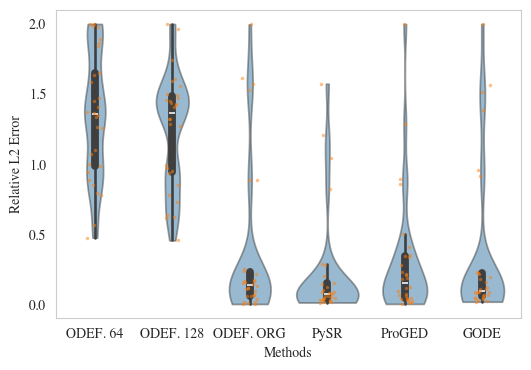

In [14]:
df["Methods"] = df["Methods"].replace({
    "odeformerORG": "ODEF. ORG",
    "odeformer128": "ODEF. 128",
    "odeformer64": "ODEF. 64",
    "pysr": "PySR",
    "proged": "ProGED",
    "gvae": "GODE",
})
plt.figure(figsize=(6,4))
mpl.rc('font', family = 'Times')
mpl.rcParams['mathtext.fontset'] = 'stix'
sns.violinplot(x = 'Methods', y = 'L2 Error', data = df, cut = 0, bw_method = 0.3, order = ['ODEF. 64', 'ODEF. 128', 'ODEF. ORG', 'PySR','ProGED', 'GODE'], color = 'tab:blue', alpha = 0.5)
sns.stripplot(x = 'Methods', y = 'L2 Error', data = df, order = ['ODEF. 64', 'ODEF. 128', 'ODEF. ORG', 'PySR', 'ProGED','GODE'], jitter=True,color = 'tab:orange', marker = '.', alpha = 0.5)
plt.yticks([0,0.5,1,1.5,2])
plt.ylabel('Relative L2 Error')
plt.grid(False)
#plt.savefig('B1_Results_explicit_Violin.png', dpi = 600, bbox_inches = 'tight')